1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

2. Importing Data

In [2]:
Gold_Price=pd.read_csv("E:\Excelr files\project\Gold_data.csv")
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


Exploratory Data Analysis(EDA)

3. Data Understanding

In [3]:
Gold_Price.shape

(2182, 2)

In [4]:
Gold_Price.info

<bound method DataFrame.info of             date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]>

In [5]:
Gold_Price.dtypes

date      object
price    float64
dtype: object

Date is objective type data

In [6]:
Gold_Price.isna().sum()

date     0
price    0
dtype: int64

There is no null values in the data set

In [7]:
Gold_Price.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
Gold_Price.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [9]:
Gold_Price.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [10]:
Gold_Price.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [11]:
Gold_Price.value_counts()

date        price 
2016-01-01  2252.6    1
2019-12-28  3464.2    1
2019-12-22  3375.1    1
2019-12-23  3398.0    1
2019-12-24  3431.0    1
                     ..
2017-12-22  2598.7    1
2017-12-21  2599.0    1
2017-12-20  2597.1    1
2017-12-19  2591.5    1
2021-12-21  4346.5    1
Length: 2182, dtype: int64

In [12]:
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


4. Data Preparation

1.Since date columnn is objective type data need to change it to type date time

In [13]:
Gold_Price['date'] = pd.to_datetime(Gold_Price['date'])
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [14]:
Gold_Price.dtypes

date     datetime64[ns]
price           float64
dtype: object

2. Chaining index to the data in order to make it proper time series data

In [15]:
Gold_Price_New = pd.read_csv('E:\Excelr files\project\Gold_data.csv', header=0, index_col=0,squeeze=True,parse_dates=True)
Gold_Price_New 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16212\4026192586.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Gold_Price_New = pd.read_csv('E:\Excelr files\project\Gold_data.csv', header=0, index_col=0,squeeze=True,parse_dates=True)


date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

3. Cleaning and Handling the missing values & Outliers

In [16]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


 Box plot for checking outliers present in my dataset

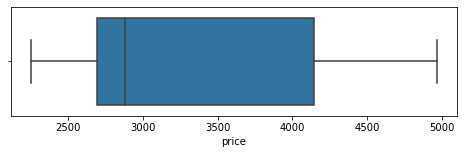

In [17]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x = Gold_Price['price'], whis=1.5)

There are no outliers present in my dataset

Visualization of data distribution

A.Plot

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

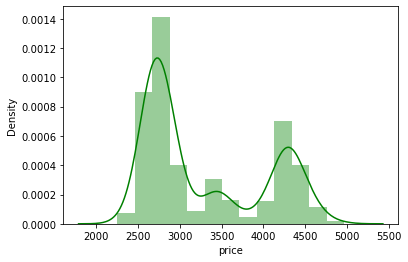

In [18]:
sns.distplot(Gold_Price['price'],color='green')

1. Histogram

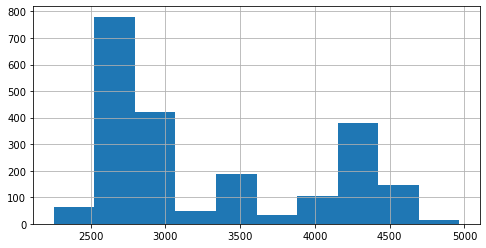

In [19]:
plt.figure(figsize=(8,4))
Gold_Price_New.hist()
plt.show()

This histogram is right skewed,coz most of value fall on left side and tail is right skewed ,. It means mean value is small than median

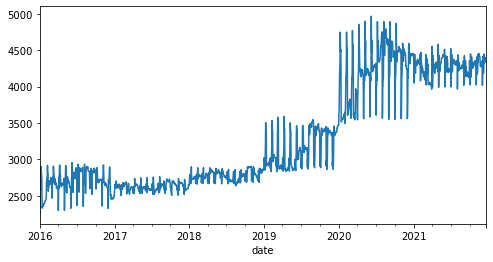

In [20]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot()
plt.show()

Trend is upword or positive

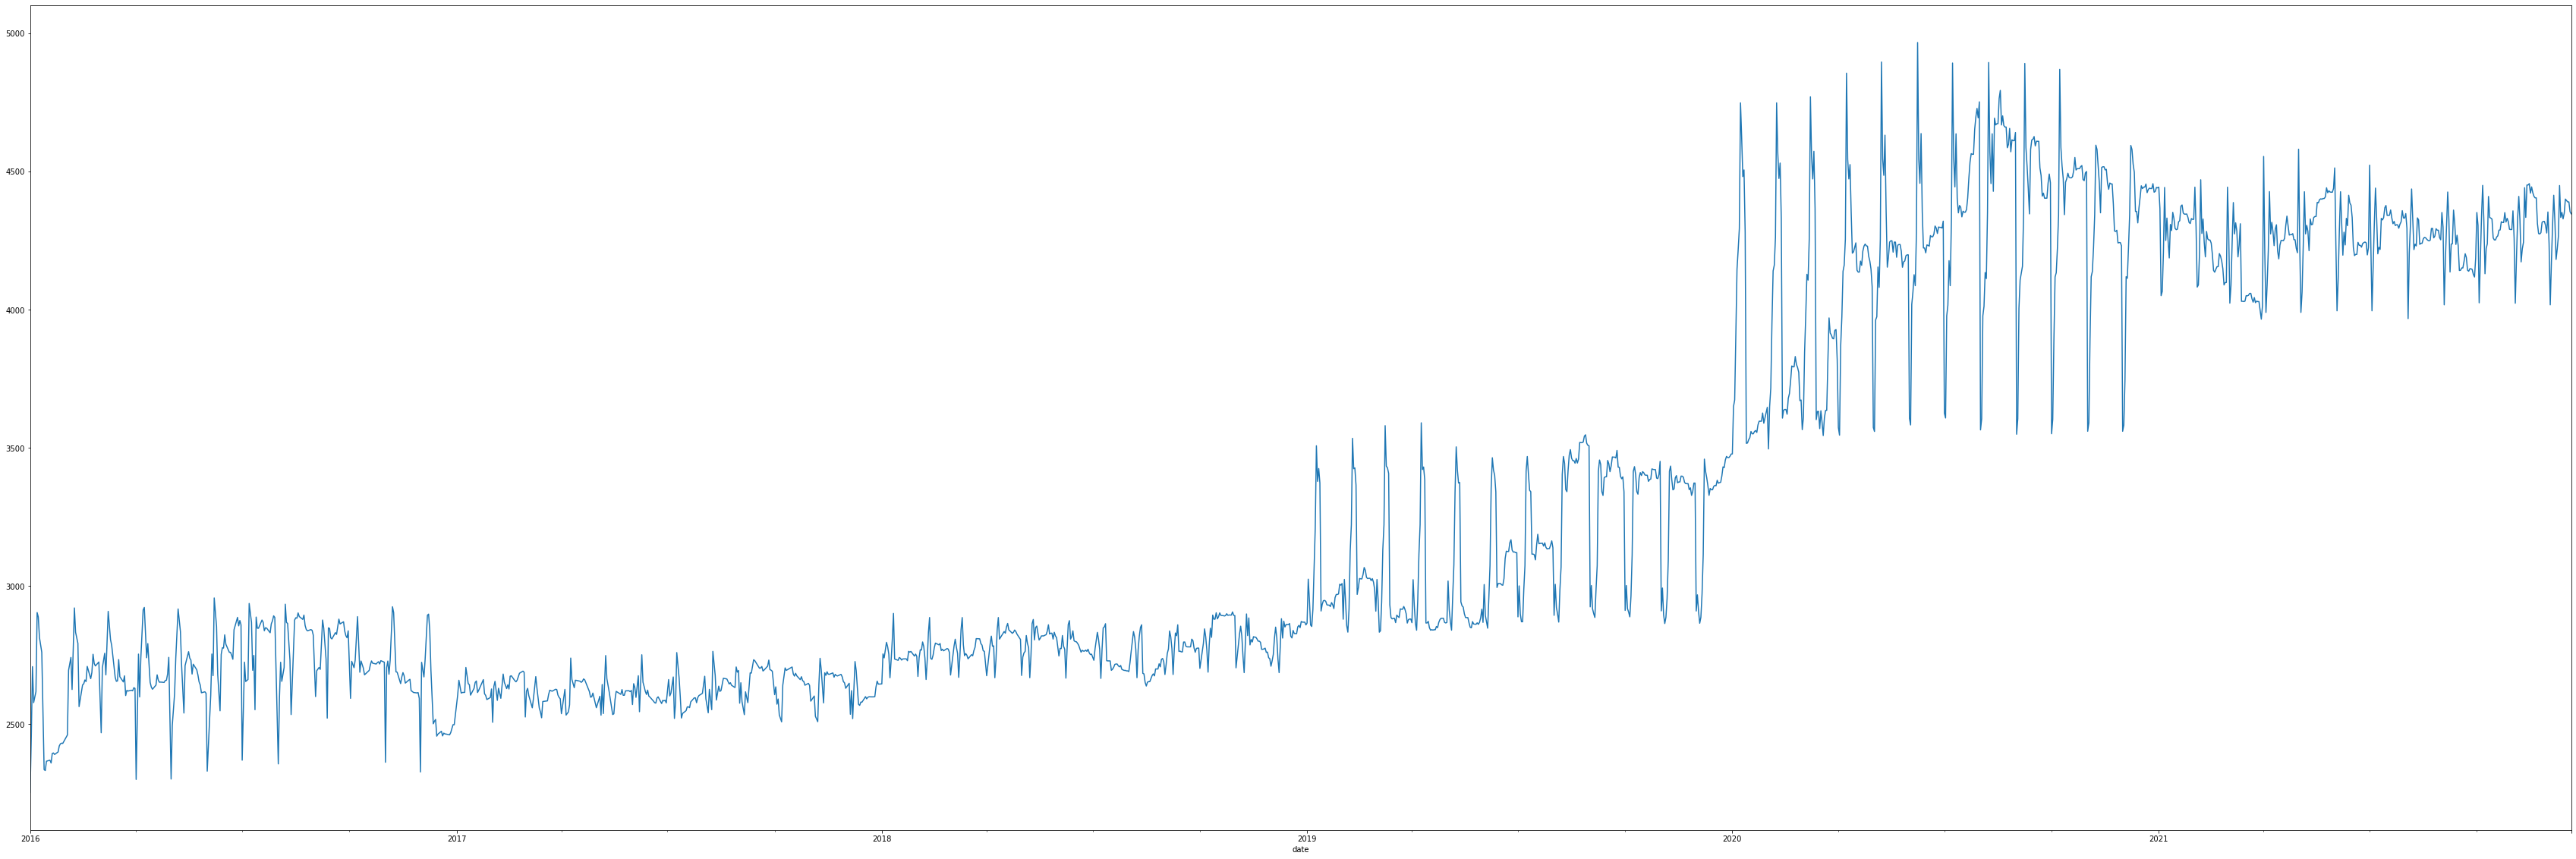

In [21]:
plt.figure(figsize=(60,20))
Gold_Price_New.plot()
plt.show()

 Seasonality can be observed little bit

9.Correlation between variables & Visualizing in heat map

== Since our data is univarient we cannot compare between two variables, So we neeed to look into the Lag plot which is nothing but the plotting of value against its lagged value

#To check randomness of data.

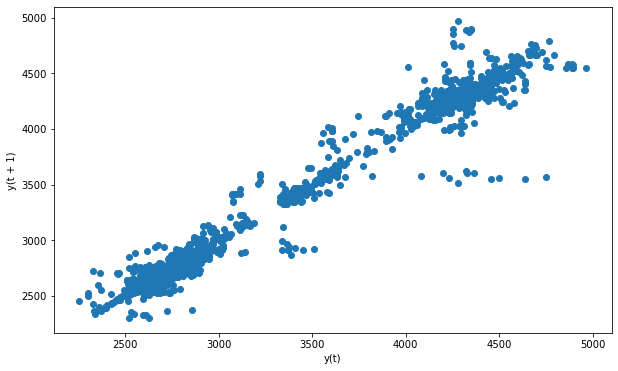

In [22]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=1)
plt.show()

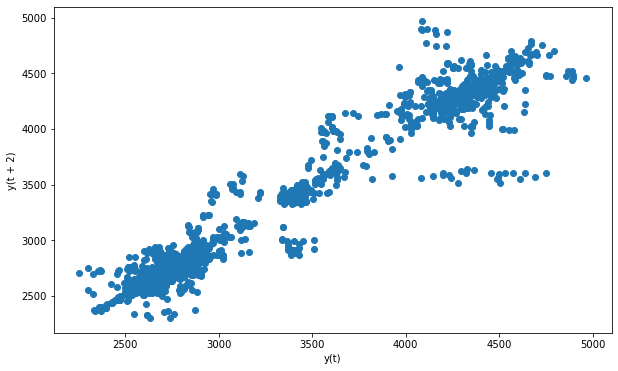

In [23]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=2)
plt.show()

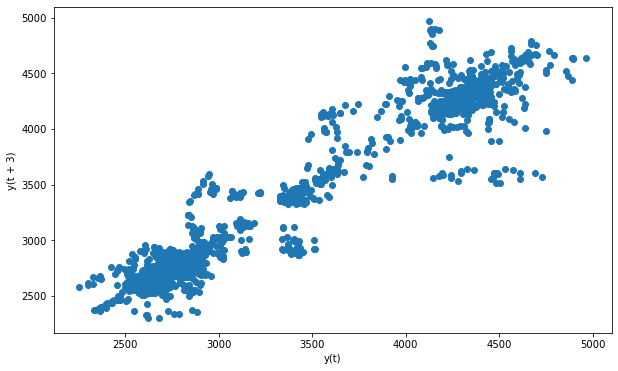

In [24]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=3)
plt.show()

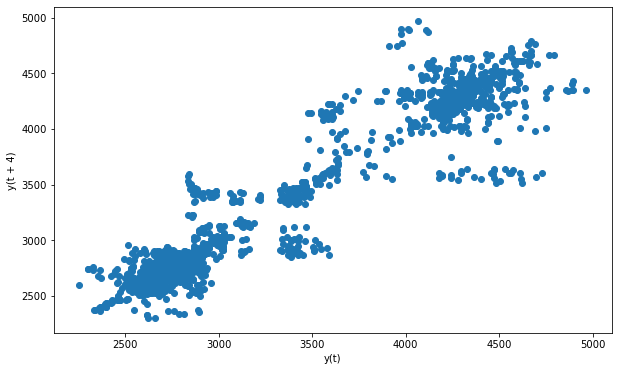

In [25]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=4)
plt.show()

From lag_1,2,3 & 4 suggest the positive correlation

Positive correlation means last month price is affecting current month price

Creating autocorrelation plot

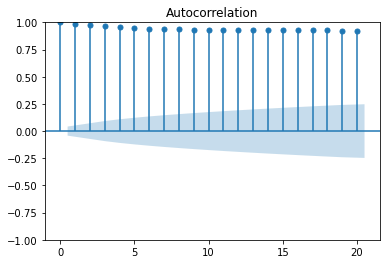

In [26]:
plot_acf(Gold_Price_New, lags=20)
plt.show()

It show correlation coeficient is perfectly positive (+1)

Autocorrelation plot suggest that immediate lags have significate relationship to build a good forecating model

Heat map

In [27]:
Gold_Price['price']=round(Gold_Price['price'])
Gold_Price['Year']=Gold_Price['date'].dt.year
Gold_Price['Month_of_Year']=Gold_Price['date'].dt.month

Lets see Heat map visualization of the data on monthly of each year

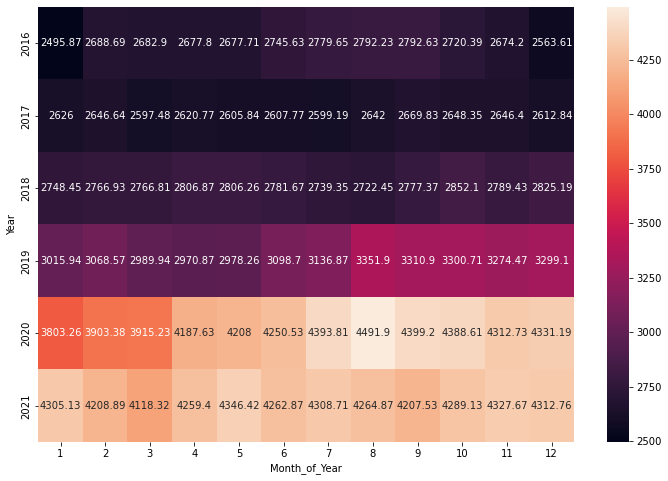

In [28]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Gold_Price,values="price",index="Year",columns="Month_of_Year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

Boxplot for all the month throughout all the years

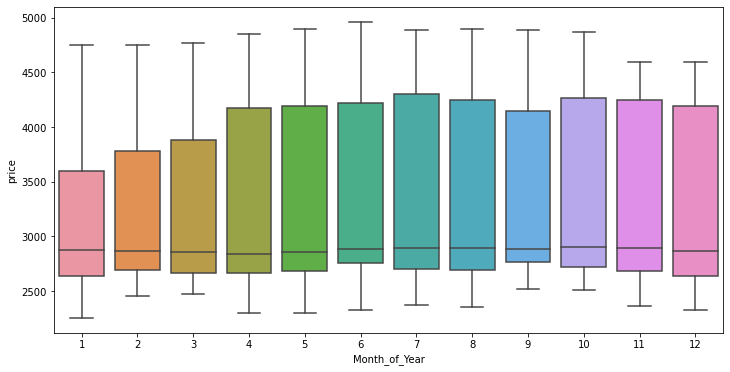

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='price',data=Gold_Price)
plt.show()

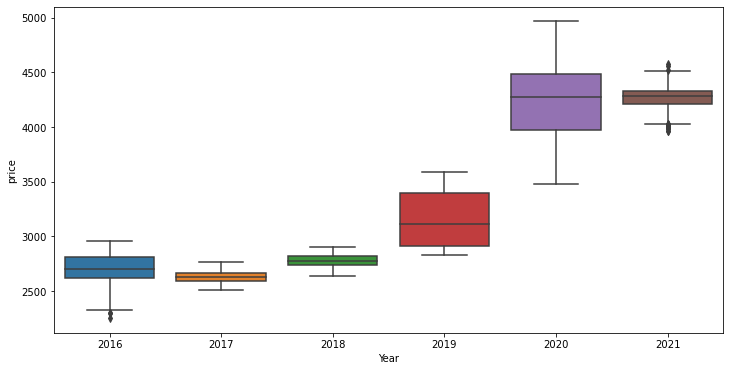

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='price',data=Gold_Price)
plt.show()

Time series decomposition plot

To find the clear trend
To find the seasonality(Additive/Multiplicative)

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 4320x1440 with 0 Axes>

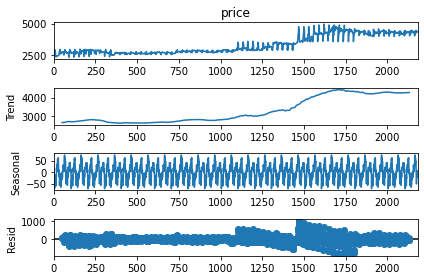

In [32]:
plt.figure(figsize=(60,20))
decompose_ts_add = seasonal_decompose(Gold_Price['price'[:30]], period=100)
decompose_ts_add.plot()
plt.show()

In [33]:
Gold_Price["date"]= pd.to_datetime(Gold_Price["date"])
indexdata=Gold_Price.set_index(["date"])

In [34]:
from datetime import datetime

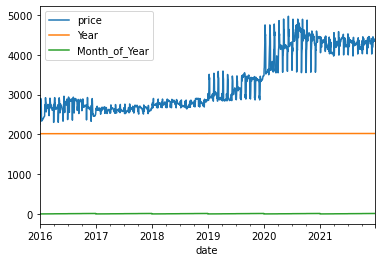

In [35]:
indexdata.plot()
plt.show()

In [36]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
...,...,...,...
2021-08-31,4264.870968,2021.0,8.0
2021-09-30,4207.533333,2021.0,9.0
2021-10-31,4289.129032,2021.0,10.0


In [37]:
quarterly_mean_sales.head(20)

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
2016-06-30,2745.633333,2016.0,6.0
2016-07-31,2779.645161,2016.0,7.0
2016-08-31,2792.225806,2016.0,8.0
2016-09-30,2792.633333,2016.0,9.0


In [38]:
from pandas import Grouper
from pandas import DataFrame

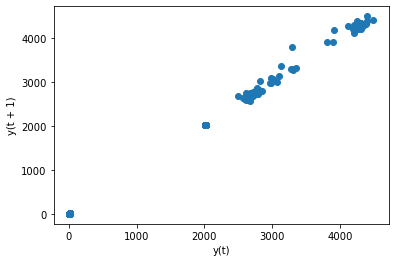

In [39]:
from pandas.plotting import lag_plot
lag_plot(quarterly_mean_sales)
plt.show()

Time series forecasting

Train-Test Split()

In [40]:
train_len=int(Gold_Price.shape[0]*0.80)
train=Gold_Price[0:train_len]
test=Gold_Price[train_len:]



In [41]:
train

,date,price,Year,Month_of_Year
0,2016-01-01,2253.0,2016,1
1,2016-01-02,2454.0,2016,1
2,2016-01-03,2708.0,2016,1
3,2016-01-04,2578.0,2016,1
4,2016-01-05,2598.0,2016,1
...,...,...,...,...
1740,2020-10-06,4222.0,2020,10
1741,2020-10-07,4341.0,2020,10
1742,2020-10-08,4869.0,2020,10
1743,2020-10-09,4586.0,2020,10


In [42]:
test


,date,price,Year,Month_of_Year
1745,2020-10-11,4474.0,2020,10
1746,2020-10-12,4343.0,2020,10
1747,2020-10-13,4461.0,2020,10
1748,2020-10-14,4473.0,2020,10
1749,2020-10-15,4493.0,2020,10
...,...,...,...,...
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12


Comparing different time series forecasting method

1.Naive Method

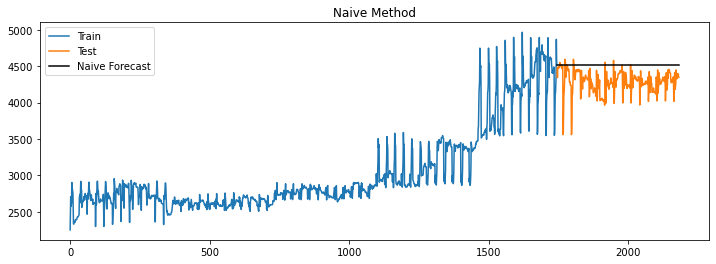

In [54]:
#mapping o previous values
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['price'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast', color='black')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [57]:
y_hat_naive['naive_forecast']

1745    4519.0
1746    4519.0
1747    4519.0
1748    4519.0
1749    4519.0
         ...  
2177    4519.0
2178    4519.0
2179    4519.0
2180    4519.0
2181    4519.0
Name: naive_forecast, Length: 437, dtype: float64

In [62]:
#calculate RSME & MPSE
import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE & MAPE for Naive
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_naive['naive_forecast'])/test['price'])*100,2)
results = pd.DataFrame({ "Method":["Naive Method"],  "MAPE":[mape],"RMSE":[rmse]})
results = results[['Method', 'MAPE', 'RMSE']]
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63


Simple Average Method

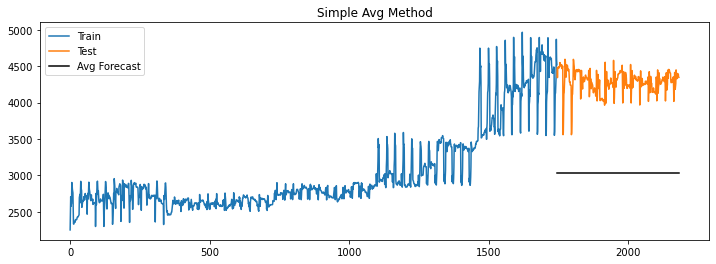

In [63]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['price'].mean()
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Avg Forecast', color='black')
plt.legend(loc='best')
plt.title('Simple Avg Method')
plt.show()

In [64]:
y_hat_avg['avg_forecast']

1745    3033.844699
1746    3033.844699
1747    3033.844699
1748    3033.844699
1749    3033.844699
           ...     
2177    3033.844699
2178    3033.844699
2179    3033.844699
2180    3033.844699
2181    3033.844699
Name: avg_forecast, Length: 437, dtype: float64

In [65]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_avg['avg_forecast'])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Simple Average Method"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63
0,Simple Average Method,29.11,1260.01


Simple Moving Average

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16212\2674611443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


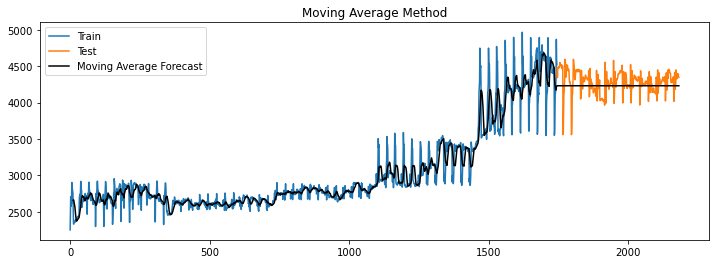

In [67]:
# Simple Moving Avg - 12
y_hat_sma = Gold_Price.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = Gold_Price['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Moving Average Forecast', color='black')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Simple Average Method - 12"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63
0,Simple Average Method,29.11,1260.01
0,Simple Average Method - 12,2.83,157.15


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16212\1469484314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


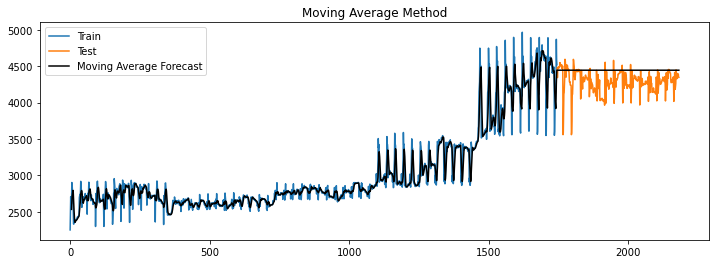

In [72]:
# Simple Moving Avg - 6
y_hat_sma =  Gold_Price.copy()
ma_window = 6
y_hat_sma['sma_forecast'] =  Gold_Price['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Moving Average Forecast', color='black')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [73]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Simple Average Method - 6"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63
0,Simple Average Method,29.11,1260.01
0,Simple Average Method - 12,2.83,157.15
0,Simple Average Method - 6,4.12,217.70


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16212\1228814957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


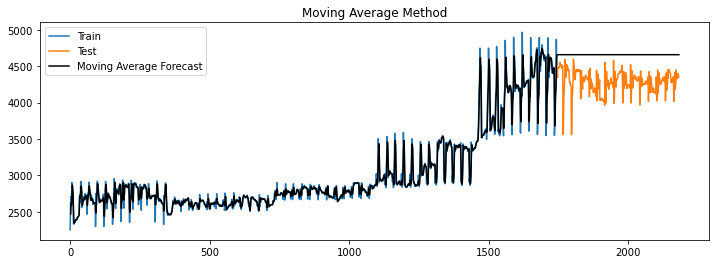

In [75]:
# Simple Moving Avg - 6
y_hat_sma =Gold_Price .copy()
ma_window = 3
y_hat_sma['sma_forecast'] = Gold_Price['price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Moving Average Forecast', color='black')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Simple Average Method - 3"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

Holts Method With Trend

In [84]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings("ignore")

In [85]:
model = ExponentialSmoothing(np.asarray(train['price']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.9714285714285713, 'smoothing_trend': 0.02312925170068027, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2352.7333333333318, 'initial_trend': 55.90303030303046, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [86]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

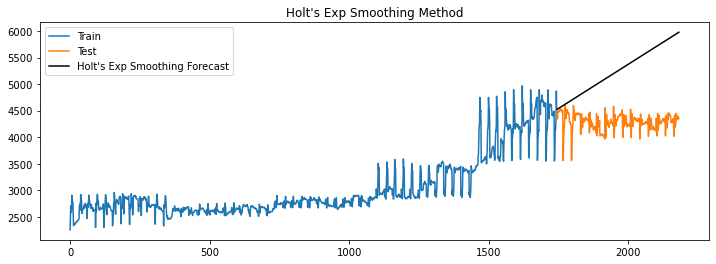

In [87]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s Exp Smoothing Forecast', color='black')
plt.legend(loc='best')
plt.title('Holt\'s Exp Smoothing Method')
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_holt['holt_forecast'])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Holt's Exp Smoothing Method"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63
0,Simple Average Method,29.11,1260.01
0,Simple Average Method - 12,2.83,157.15
0,Simple Average Method - 6,4.12,217.70
0,Simple Average Method - 3,8.84,401.06
0,Holt's Exp Smoothing Method,22.69,1067.47


Holt Winter Additive Method With Trend And Seasonality

In [89]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['price']),seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.960046428422417, 'smoothing_trend': 0.04354496300344535, 'smoothing_seasonal': 0.0241319572328601, 'damping_trend': nan, 'initial_level': 2707.3708333333316, 'initial_trend': -20.154393939393756, 'initial_seasons': array([-1.16302431e+01, -2.61423264e+01,  1.80902778e-02, -8.40899306e+00,
       -7.23263889e-02, -5.15899306e+00,  8.25475694e+00,  5.86423611e-01,
       -1.01439931e+01,  8.01475694e+00,  1.50647569e+01,  2.00780903e+01]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [90]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(test.shape[0])

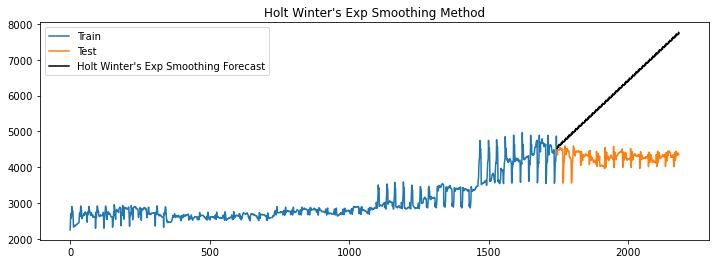

In [91]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winter\'s Exp Smoothing Forecast', color='black')
plt.legend(loc='best')
plt.title('Holt Winter\'s Exp Smoothing Method')
plt.show()

In [92]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price'] - y_hat_hwa['hwa_forecast'])/test['price'])*100,2)
tempResults = pd.DataFrame({
    "Method":["Holt Winter\'s Exp Additive Smoothing Method"],
    "MAPE":[mape],
    "RMSE":[rmse]
})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,5.63,276.63
0,Simple Average Method,29.11,1260.01
0,Simple Average Method - 12,2.83,157.15
0,Simple Average Method - 6,4.12,217.70
0,Simple Average Method - 3,8.84,401.06
0,Holt's Exp Smoothing Method,22.69,1067.47
0,Holt Winter's Exp Additive Smoothing Method,43.65,2088.86
